**Data Preparation : Kwang**

In [ ]:
import gdown

# Replace 'your_google_drive_link' with the actual link of the file you want to download
#300*300    1Wl-6RT-k-XaLaznkKeHYhqGPOdPhSZTW
#600*600    1WsmMYCz5poZYgdhEpwlW3n1KLyYjbShw
#300*300 color    1WzaZ88vYQ50Io9-2GTVXOzFMRD5zOmGj
google_drive_link = f'https://drive.google.com/uc?id=1SLPVVz00YZNEa3Som7ww9lpEZ23xup2A'

# Specify the output file name
output_file = 'images_dataset.zip'

# Download the file
gdown.download(google_drive_link, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1SLPVVz00YZNEa3Som7ww9lpEZ23xup2A
To: /content/images_dataset.zip
100%|██████████| 4.07M/4.07M [00:00<00:00, 93.9MB/s]


'images_dataset.zip'

In [ ]:
#Unzip file
import zipfile

def unzip_file(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

zip_file_path = '/content/images_dataset.zip'
extracted_folder_path = '/content/extracted_images'

unzip_file(zip_file_path, extracted_folder_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from tensorflow.keras.models import Model # basic class for specifying and training a neural network
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 #pip3 install opencv-python
import urllib
import urllib
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from google.colab.patches import cv2_imshow

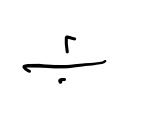

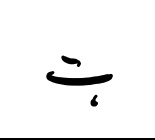

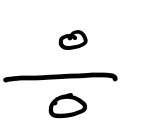

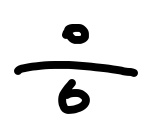

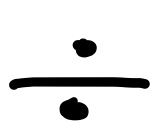

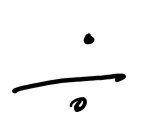

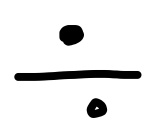

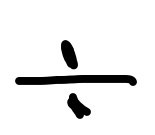

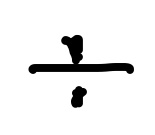

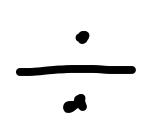

In [ ]:
for image_number in range(1, 11):
  image = cv2.imread(f"/content/extracted_images/symbol/image_{image_number}.jpg")
  cv2_imshow(image)

In [ ]:
import cv2

for image_number in range(1100):
    image = cv2.imread(f"/content/extracted_images/symbol/image_{image_number}.jpg")
    desired_width = 150 # Desired width
    desired_height = 130  # Desired height

    resized_img = cv2.resize(image, (desired_width, desired_height))
    cv2.imwrite(f"/content/extracted_images/symbol/image_{image_number}.jpg", resized_img)

cv2.imread(f"/content/extracted_images/symbol/image_1.jpg").shape

(130, 150, 3)

In [ ]:
data = pd.read_csv("/content/extracted_images/symbol/labeled_music_notes.csv")
print(data)

      Unnamed: 0      image_name  target
0              0     image_0.jpg       0
1              1     image_1.jpg       0
2              2    image_10.jpg       0
3              3    image_11.jpg       0
4              4    image_12.jpg       0
...          ...             ...     ...
1095        1095  image_1095.jpg      10
1096        1096  image_1096.jpg      10
1097        1097  image_1097.jpg      10
1098        1098  image_1098.jpg      10
1099        1099  image_1099.jpg      10

[1100 rows x 3 columns]


In [ ]:
#convert images to matrix
from PIL import Image

def image_to_matrix(image_name):
  all_matrices = []

  for file_name in image_name.to_list():
      # Create the full path to the image file
      image_path = f'/content/extracted_images/symbol/{file_name}'

      # Open the grayscale image
      image = Image.open(image_path)

      # Convert the image to a NumPy array
      image_matrix = np.array(image)

      # Append the matrix to the list
      all_matrices.append(image_matrix)

  # Convert the list of matrices to a NumPy array
  diabetic_retinopathy_data = np.array(all_matrices)
  return diabetic_retinopathy_data


**Train model : Mild, Nina**

In [ ]:
class_names = ['div', 'equal', 'Intigrate', 'Lambda', 'minus', 'Mu', 'plus', 'Root', 'Sigma big', 'Sigma small', 'time']
num_classes = len(class_names)


batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 32 # (we iterate 200 times over the entire training set) change to 10

In [ ]:
#split data

random_seed = 42

from sklearn.model_selection import train_test_split

X = data['image_name']
Y = data['target']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, Y, test_size=0.3, random_state=random_seed)

X_train = image_to_matrix(X_train_raw)
print(X_train.shape)
X_test = image_to_matrix(X_test_raw)
y_train = y_train_raw.to_numpy()
y_test = y_test_raw.to_numpy()
print(y_train[0])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = tf.keras.utils.to_categorical(y_train, 11) # One-hot encode the labels
Y_test = tf.keras.utils.to_categorical(y_test, 11) # One-hot encode the labels
class_names[np.argmax (Y_train[0])]

(770, 130, 150, 3)
2


'Intigrate'

In [ ]:
from keras.applications import VGG19
vgg = VGG19(include_top= False, weights = "imagenet", input_shape=(130,150,3))
vgg_layer_list = vgg.layers


model = Sequential ()

for layer in vgg_layer_list:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False


model.add(Flatten())

# Fully connected layer. 1 hidden layer consisting of 512 nodes
model.add(Dense(256, name='Dense1'))
model.add(Activation('sigmoid'))
model.add(Dense(256, name='Dense2'))
model.add(Activation('sigmoid'))
model.add(Dense(256, name='Dense3'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax', name='Dense4'))
print(model.summary())

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer=keras.optimizers.Adam(learning_rate=0.001), # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 130, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 130, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 65, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 65, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 65, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 37, 128)       0         
                                                         

In [ ]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation

Epoch 1/32
22/22 [==============================] - 240s 11s/step - loss: 2.4135 - accuracy: 0.1400 - val_loss: 2.0955 - val_accuracy: 0.3247
Epoch 2/32
22/22 [==============================] - 209s 10s/step - loss: 1.8665 - accuracy: 0.4113 - val_loss: 1.5993 - val_accuracy: 0.6753
Epoch 3/32
22/22 [==============================] - 225s 10s/step - loss: 1.2619 - accuracy: 0.7027 - val_loss: 1.0495 - val_accuracy: 0.8052
Epoch 4/32
22/22 [==============================] - 204s 9s/step - loss: 0.7720 - accuracy: 0.8773 - val_loss: 0.6666 - val_accuracy: 0.8831
Epoch 5/32
22/22 [==============================] - 208s 9s/step - loss: 0.4713 - accuracy: 0.9351 - val_loss: 0.4577 - val_accuracy: 0.8961
Epoch 6/32
22/22 [==============================] - 226s 10s/step - loss: 0.2999 - accuracy: 0.9582 - val_loss: 0.3350 - val_accuracy: 0.8961
Epoch 7/32
22/22 [==============================] - 205s 9s/step - loss: 0.1795 - accuracy: 0.9856 - val_loss: 0.3084 - val_accuracy: 0.9091
Epoch 8/3

In [ ]:
score_test = model.evaluate(X_test, Y_test, verbose=1)  # Evaluate the trained model on the test set!
score_train = model.evaluate(X_train, Y_train, verbose=1)
print(Y_test.shape)
print('Test loss:', score_test[0])
print('Test accuracy:', 100*score_test[1])
print('Train accuracy:', 100*score_train[1])

25/25 [==============================] - 207s 8s/step - loss: 0.0379 - accuracy: 0.9922
(330, 11)
Test loss: 0.36187154054641724
Test accuracy: 89.39393758773804
Train accuracy: 99.22077655792236


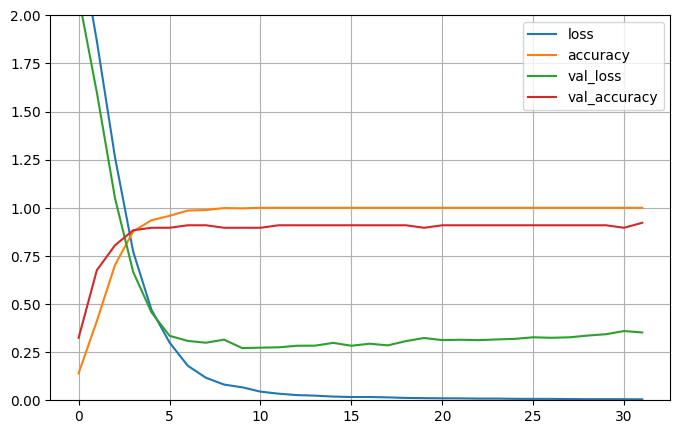

In [ ]:
err_hist = history.history
pd.DataFrame(err_hist).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

11/11 [==============================] - 89s 8s/step
[[30  1  0  0  0  0  0  2  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0]
 [ 0  0 27  1  0  0  0  1  0  2  0]
 [ 0  0  0 32  0  1  0  2  0  0  0]
 [ 0  0  1  0 27  0  0  0  0  0  0]
 [ 0  0  0  1  0 25  0  1  7  0  3]
 [ 0  0  0  0  0  0 28  0  0  0  0]
 [ 0  0  1  5  0  1  0 27  0  0  0]
 [ 0  0  0  3  0  1  0  0 24  1  0]
 [ 0  0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0  0 23]]
              precision    recall  f1-score   support

         div       1.00      0.91      0.95        33
       equal       0.96      1.00      0.98        25
   Intigrate       0.93      0.87      0.90        31
      Lambda       0.76      0.91      0.83        35
       minus       1.00      0.96      0.98        28
          Mu       0.89      0.68      0.77        37
        plus       1.00      1.00      1.00        28
        Root       0.82      0.79      0.81        34
   Sigma big       0.77      0.83      0.80        29
 Sigma sm

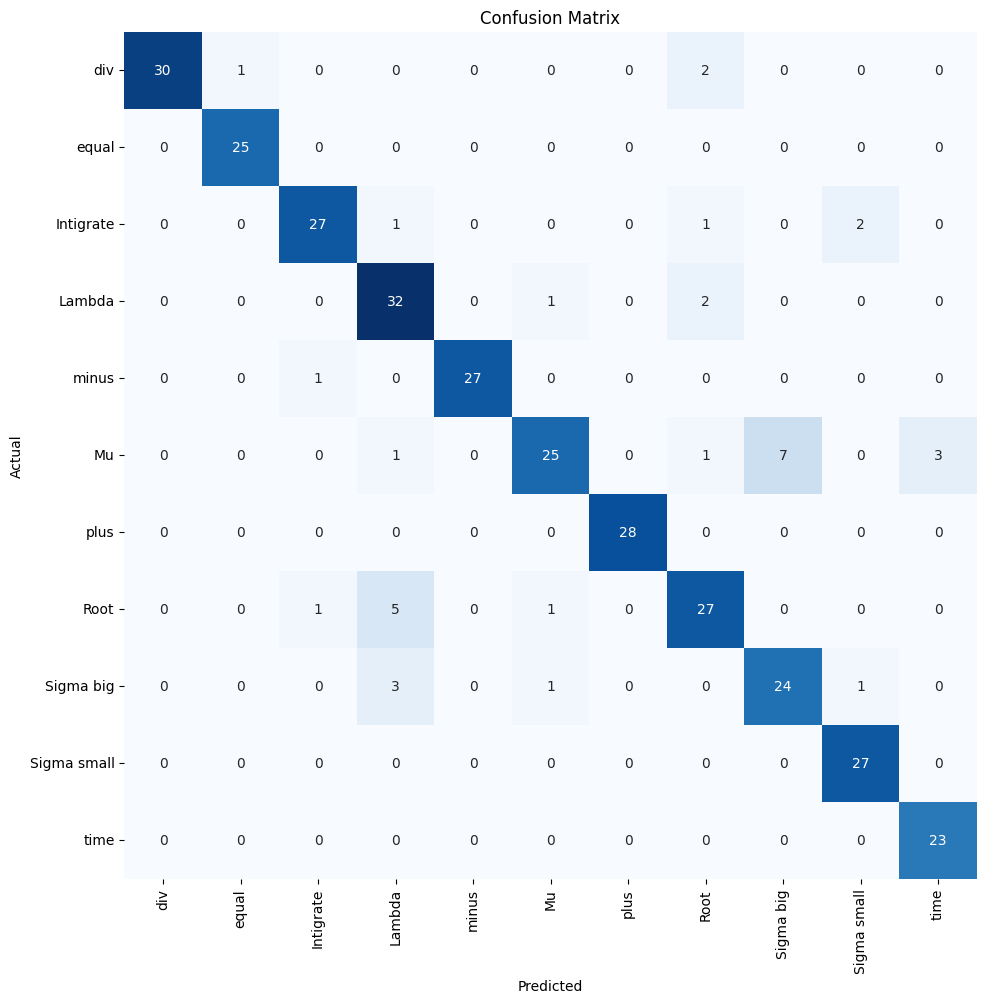

In [ ]:
predictions = model.predict(X_test)

cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes))
print(cm)
clr = classification_report(np.argmax(Y_test, axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes), target_names=class_names)
print(clr)
plt.figure(figsize=(11, 11))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(11) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(11) + 0.5, labels=class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('Confusion Matrix55.png')
plt.show()


In [ ]:
predictions = model.predict(X_test[0:1024])

11/11 [==============================] - 102s 9s/step



testing data index: 0  predict:  3  actual:  0
[8.4087718e-05 1.8856519e-05 5.8989122e-04 9.9651915e-01 9.9572817e-06
 4.2807791e-05 5.5775628e-04 8.7236788e-04 7.1606709e-04 6.1017621e-05
 5.2801339e-04]


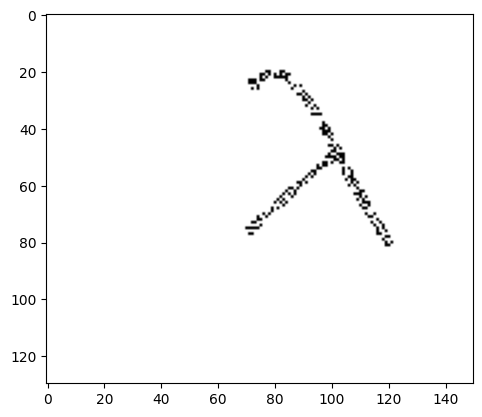


testing data index: 1  predict:  6  actual:  0
[1.9918589e-04 1.7785688e-04 1.3738420e-04 3.9859541e-04 3.6500581e-04
 7.2223294e-05 9.9788088e-01 8.9080415e-05 6.2359846e-05 4.8813484e-07
 6.1682757e-04]


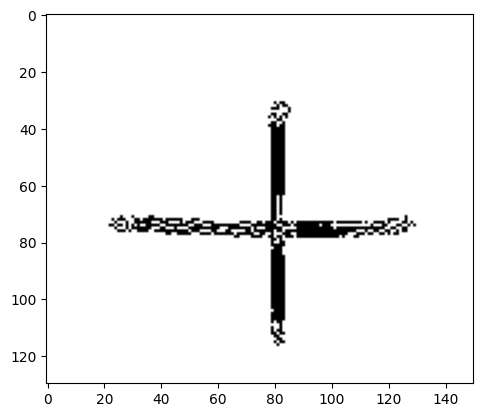


testing data index: 2  predict:  4  actual:  0
[5.0443917e-04 2.1495221e-03 8.7719520e-05 1.0642620e-05 9.9551320e-01
 2.2895000e-04 7.0127781e-04 7.2403019e-04 1.2110403e-05 4.8592774e-05
 1.9378778e-05]


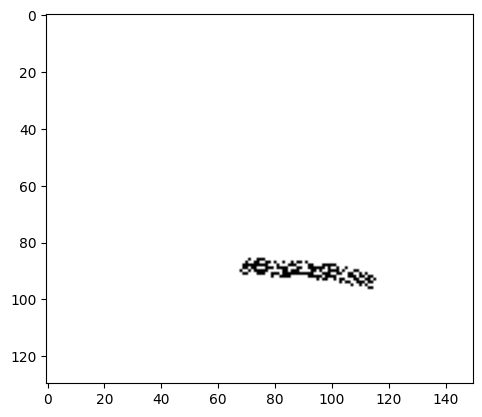

In [ ]:
count = 0
for i in range(len(predictions)):
    if count < 3: # sample only some of them
        actual = np.argmax(y_test[i])
        pred = np.argmax(predictions[i])

        if actual != pred:
            print("\ntesting data index:",i," predict: ",pred," actual: ",actual)
            print(predictions[i])
            picture = X_test[i]
            plt.gray()
            plt.imshow(picture)
            plt.show()
            count = count + 1

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 90s 8s/step


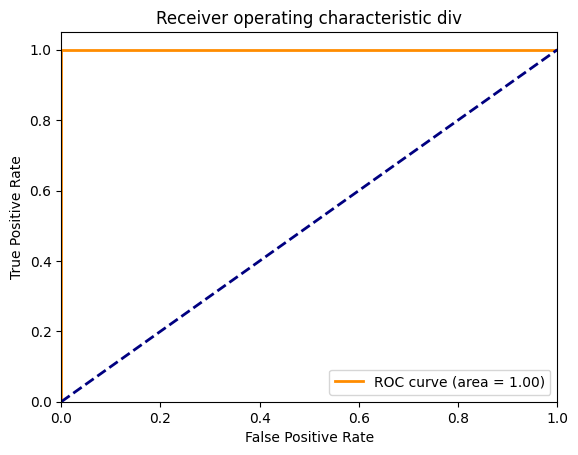

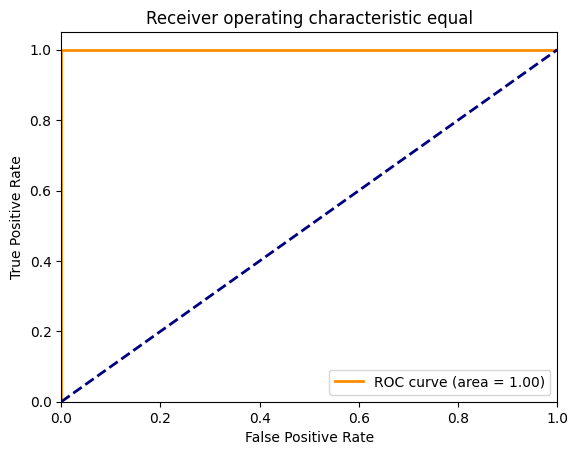

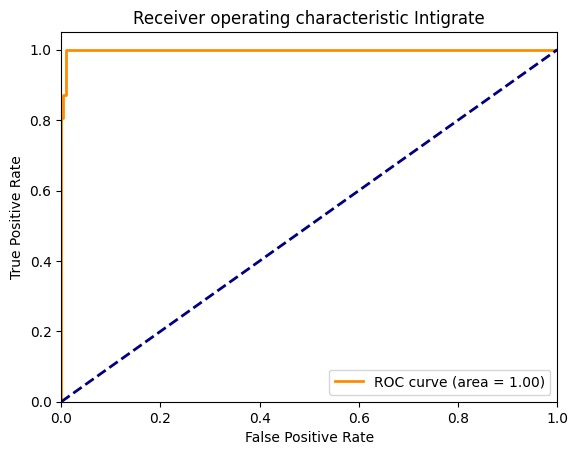

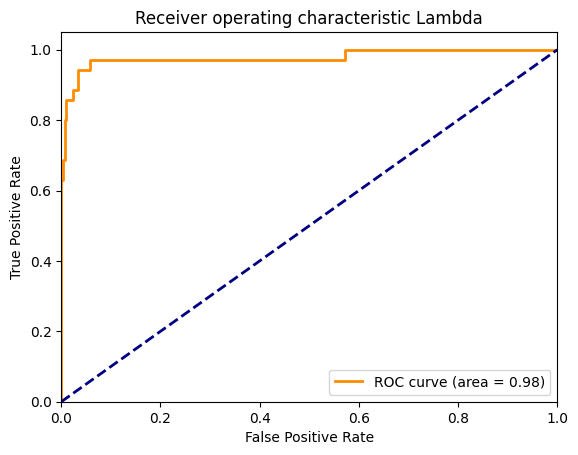

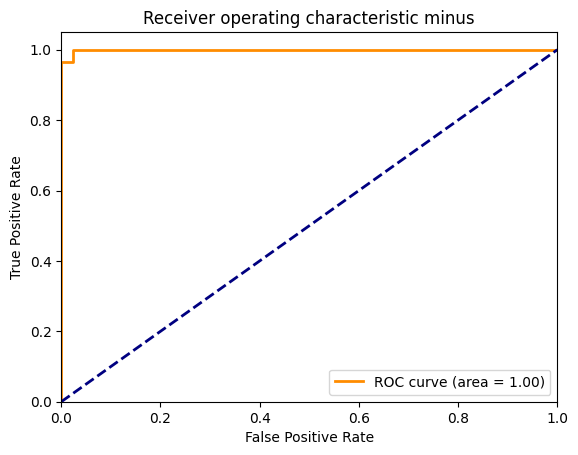

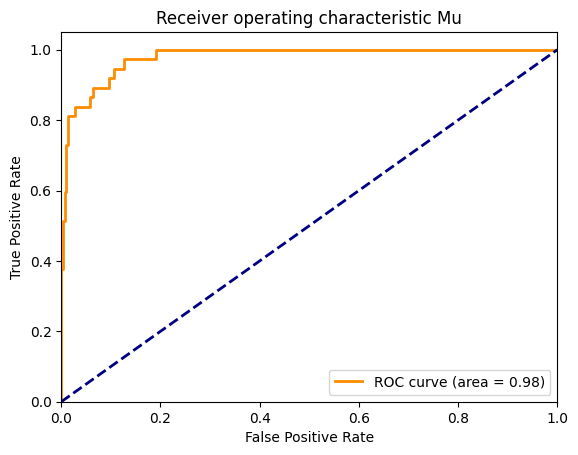

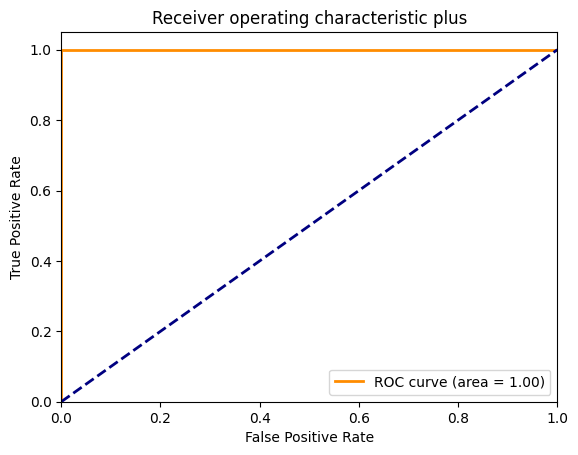

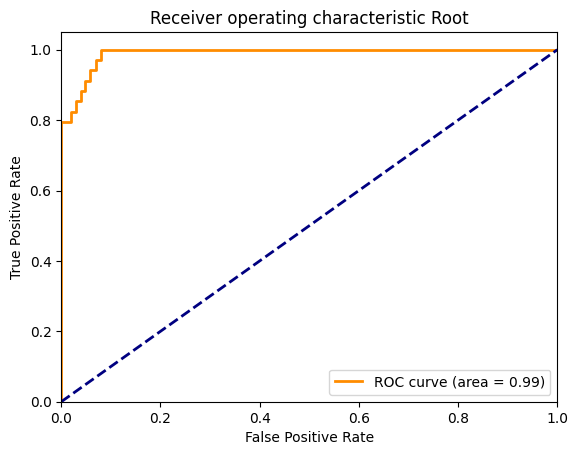

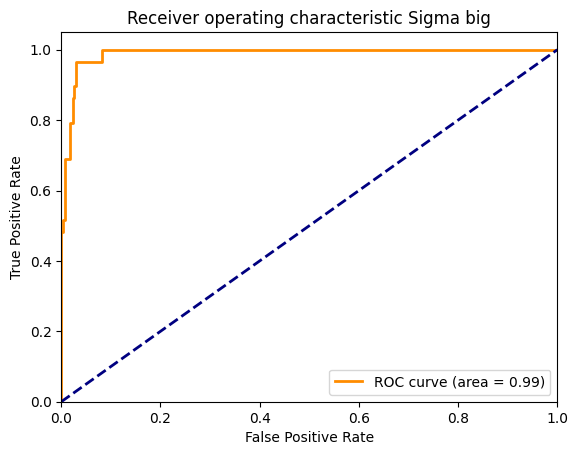

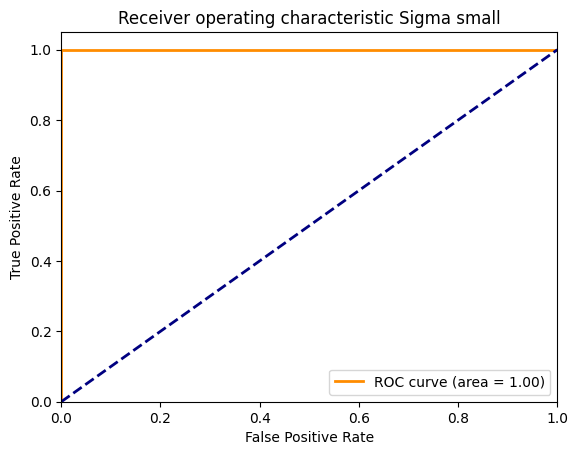

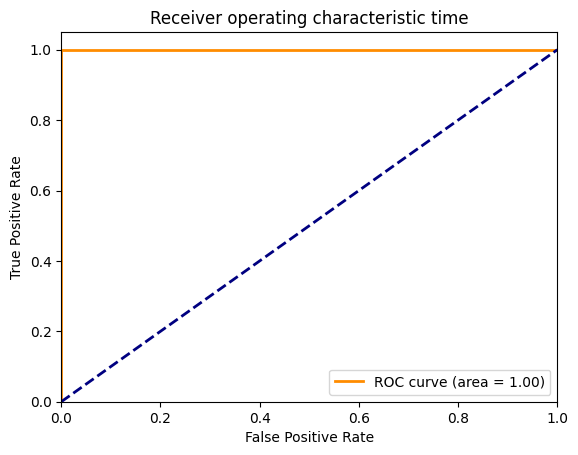

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Number of classes
n_classes = Y_test.shape[1]

# Binarize the labels
y_test_binarized = label_binarize(Y_test, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
  plt.figure()
  lw = 2
  plt.plot(fpr[i], tpr[i], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver operating characteristic {class_names[i]}')
  plt.legend(loc="lower right")
  plt.show()


#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature scaling (optional but recommended)
X_train_reshaped = X_train.reshape(770, -1)
X_test_reshaped = X_test.reshape(330, -1)
scaler = StandardScaler()
scaler.fit(X_train_reshaped)
X_train_scaled = scaler.transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Create the SVM classifier
svm = SVC(kernel='sigmoid')  # You can try different kernels like 'rbf' or 'poly'

# Train the model
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_test = svm.predict(X_test_scaled)
y_pred_train = svm.predict(X_train_scaled)

# Evaluate model performance (e.g., accuracy, confusion matrix)
from sklearn.metrics import accuracy_score
Accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy train: {Accuracy_train:.4f}")

Accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy test: {Accuracy_test:.4f}")

Accuracy train: 0.6662
Accuracy test: 0.4697


Predicted class: Lambda


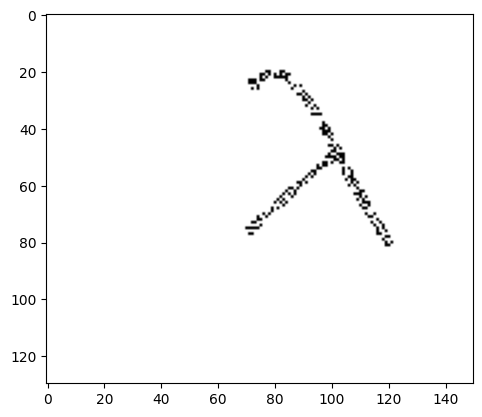

Predicted class: div


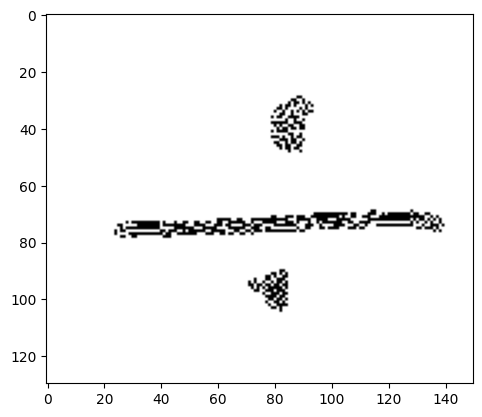

Predicted class: Intigrate


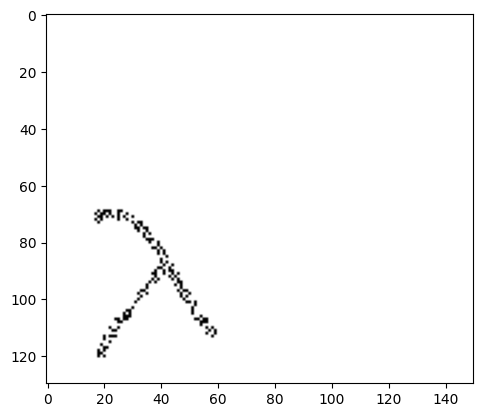

Predicted class: Lambda


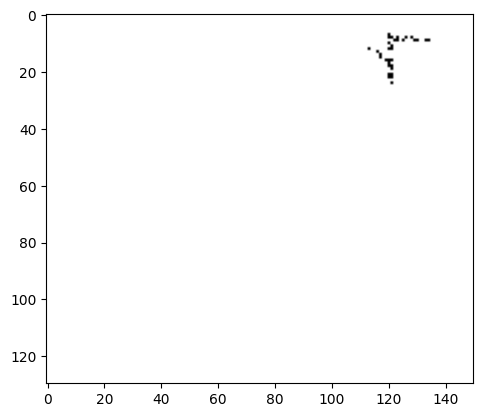

Predicted class: Intigrate


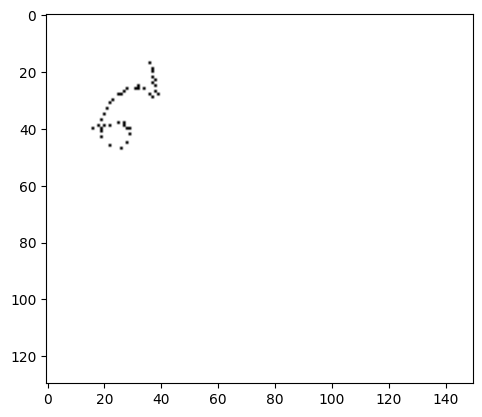

Predicted class: time


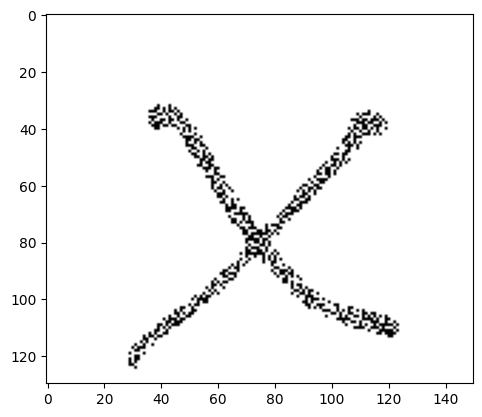

Predicted class: time


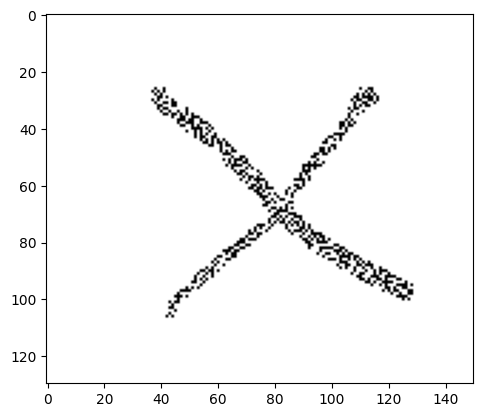

Predicted class: Lambda


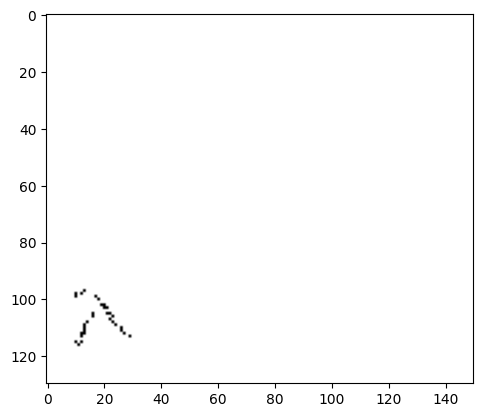

Predicted class: Sigma small


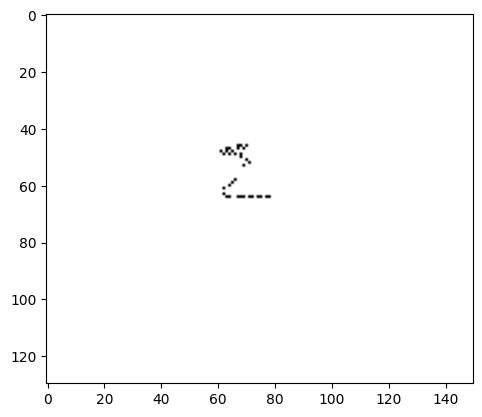

Predicted class: time


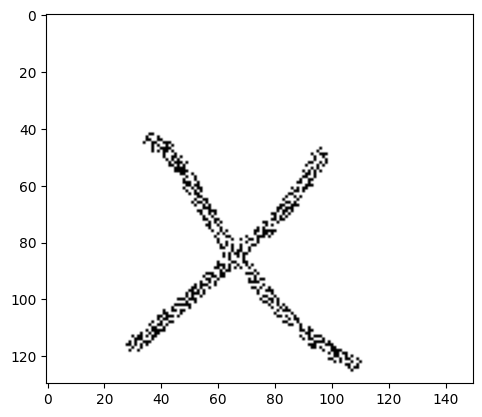

Predicted class: equal


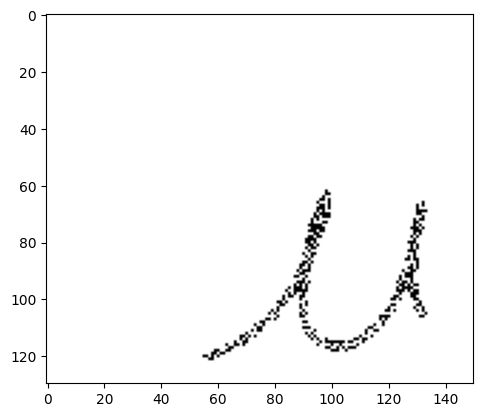

Predicted class: minus


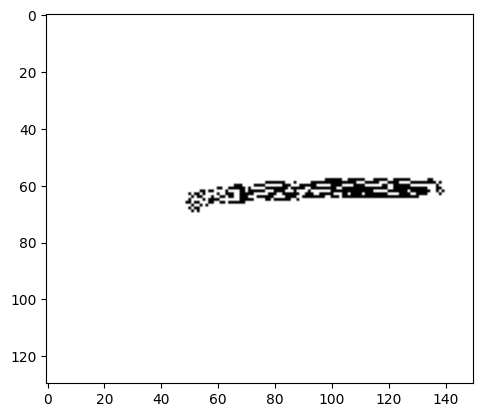

Predicted class: minus


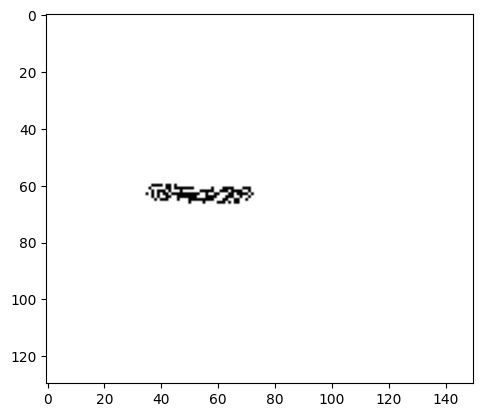

Predicted class: Root


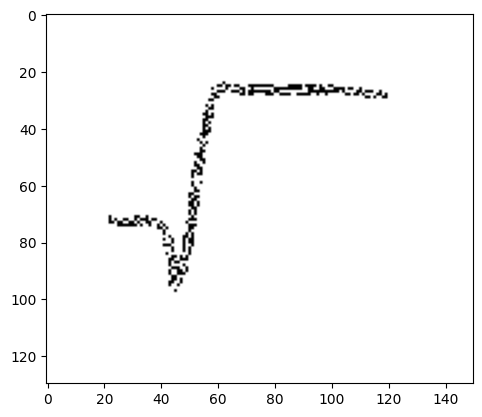

Predicted class: Lambda


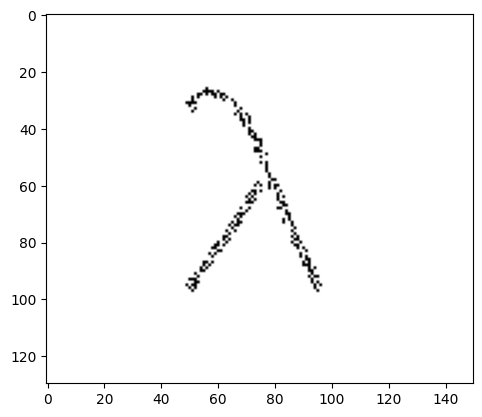

Predicted class: plus


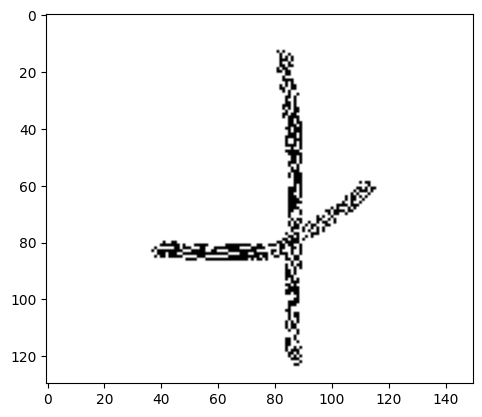

In [ ]:
# Use the trained model for prediction on new images
for img in range(0,96,6):
  new_image = X_test[img]# Prepare your new image and extract features
  new_img_reshaped = new_image.reshape(-1)
  new_image_scaled = scaler.transform(np.expand_dims(new_img_reshaped, axis=0))  # Reshape for prediction
  predicted_class = svm.predict(new_image_scaled)[0]
  print(f"Predicted class: {class_names[predicted_class]}")
  plt.imshow(new_image)
  plt.show()

#Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train_reshaped = X_train.reshape(770, -1)
X_test_reshaped = X_test.reshape(330, -1)
scaler = StandardScaler()
scaler.fit(X_train_reshaped)
X_train_scaled = scaler.transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)
# Define a parameter grid to explore different max_depth values
param_grid = {'max_depth': [3, 5, 7, 10],
              'criterion' : ["entropy" , "gini"]}

# Create the decision tree classifier
tree = DecisionTreeClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(tree, param_grid, cv = 5)  # Adjust cv for k-fold cross-validation

# Train the model with grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best model with the best hyperparameters (including max_depth)
best_model = grid_search.best_params_
print(best_model)

{'criterion': 'gini', 'max_depth': 10}


In [ ]:
tree = DecisionTreeClassifier(max_depth = 10, criterion = 'entropy')

# Train the model
tree.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_test = tree.predict(X_test_scaled)
y_pred_train = tree.predict(X_train_scaled)

# Evaluate model performance (e.g., accuracy, confusion matrix)
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy train: {accuracy_train:.4f}")

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy test: {accuracy_test:.4f}")

Accuracy train: 0.7649
Accuracy test: 0.3515


Predicted class: div


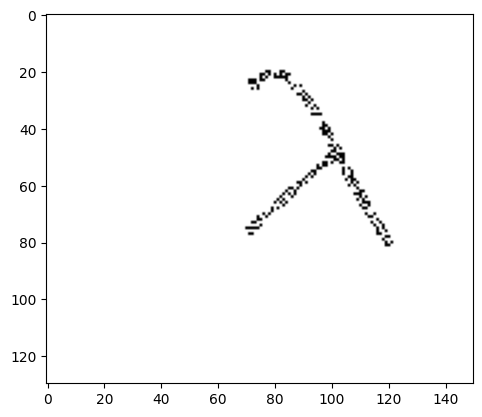

Predicted class: div


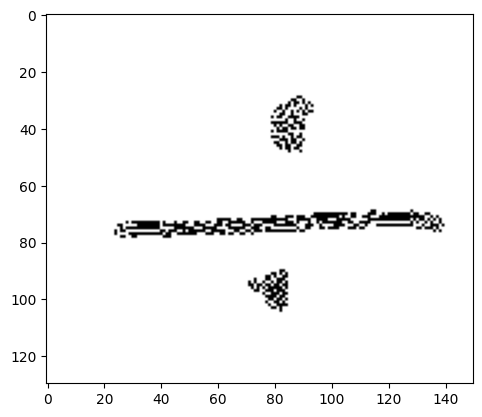

Predicted class: Lambda


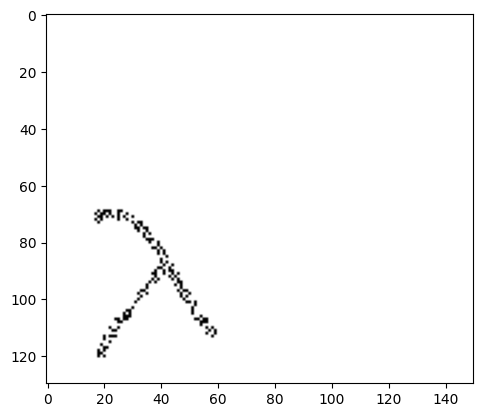

Predicted class: Intigrate


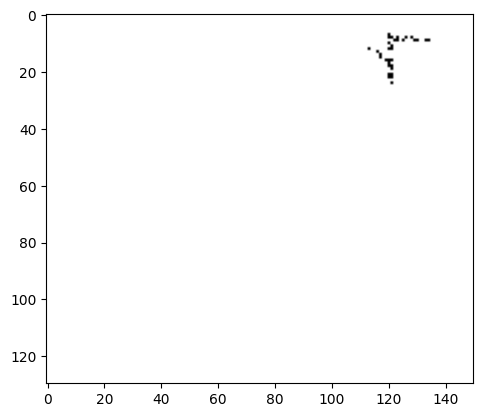

Predicted class: Intigrate


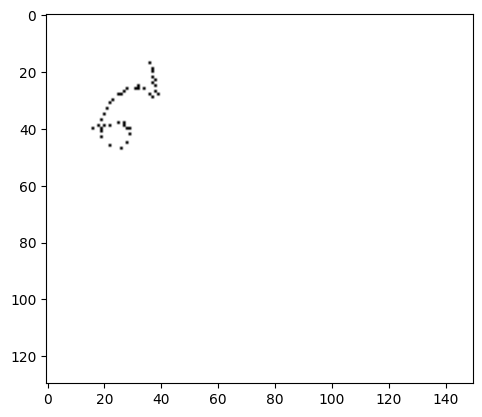

Predicted class: time


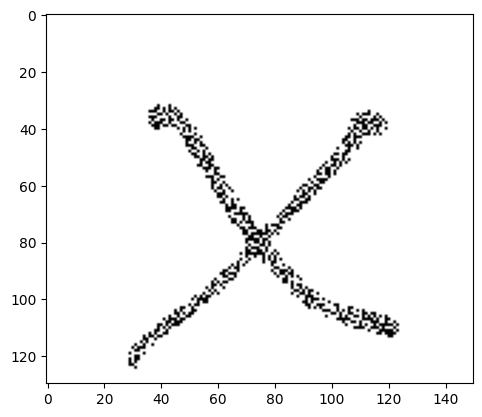

Predicted class: time


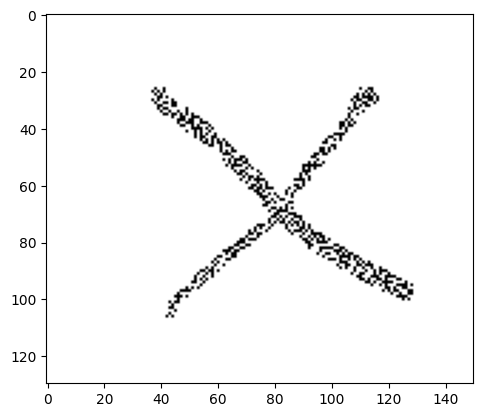

Predicted class: Intigrate


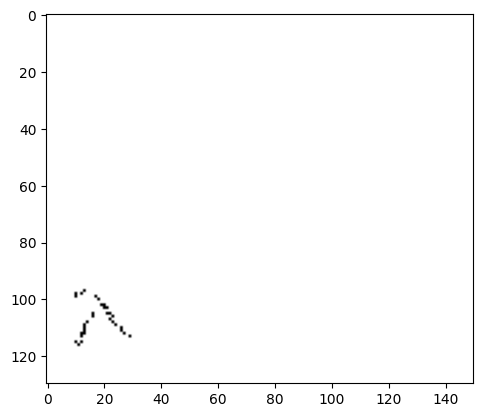

Predicted class: Intigrate


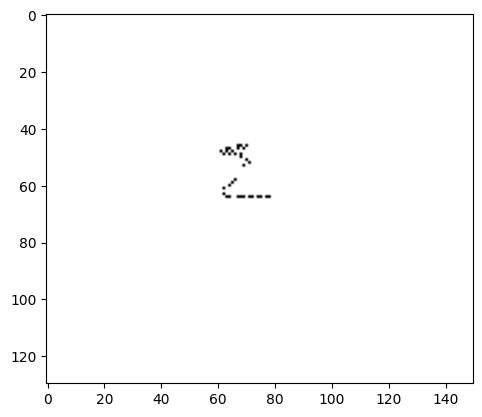

Predicted class: time


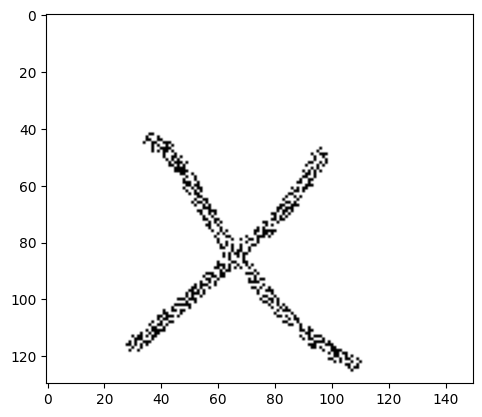

Predicted class: equal


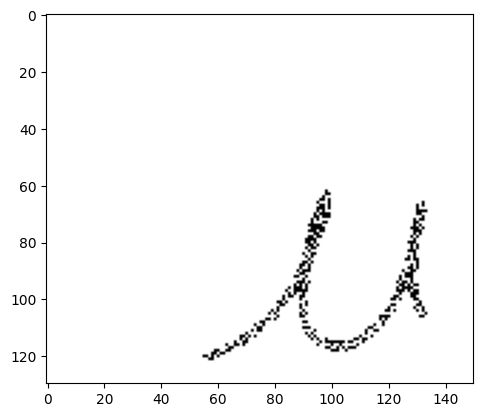

Predicted class: minus


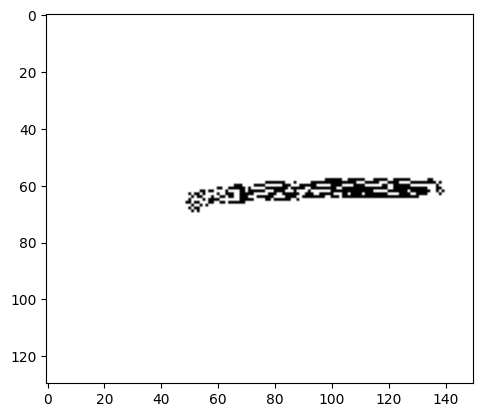

Predicted class: minus


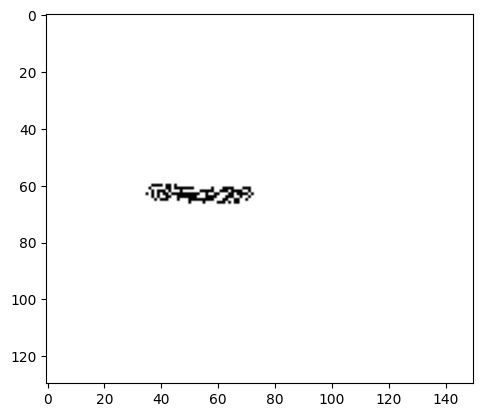

Predicted class: Intigrate


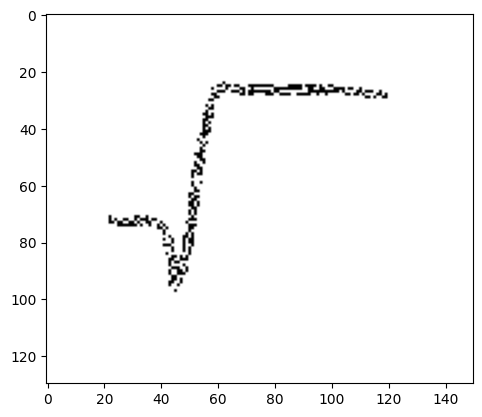

Predicted class: minus


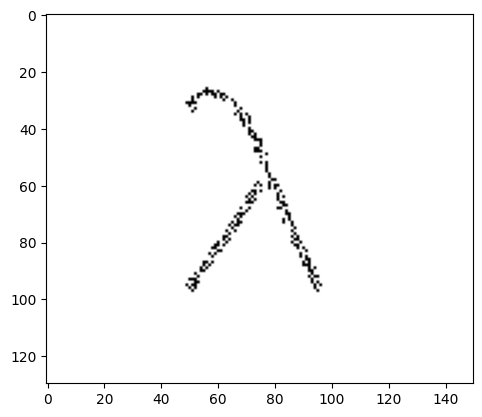

Predicted class: div


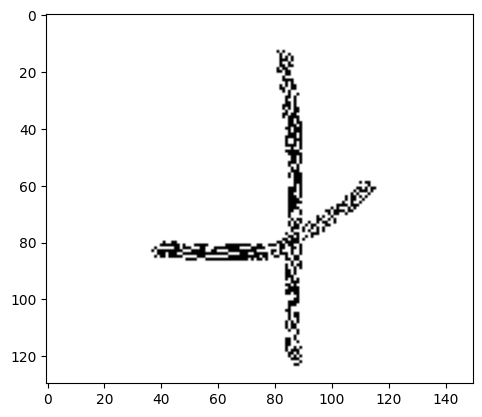

In [ ]:
# Use the trained model for prediction on new images
for img in range(0,96,6):
  new_image = X_test[img]# Prepare your new image and extract features
  new_img_reshaped = new_image.reshape(-1)
  new_image_scaled = scaler.transform(np.expand_dims(new_img_reshaped, axis=0))  # Reshape for prediction
  predicted_class = tree.predict(new_image_scaled)[0]
  print(f"Predicted class: {class_names[predicted_class]}")
  plt.imshow(new_image)
  plt.show()

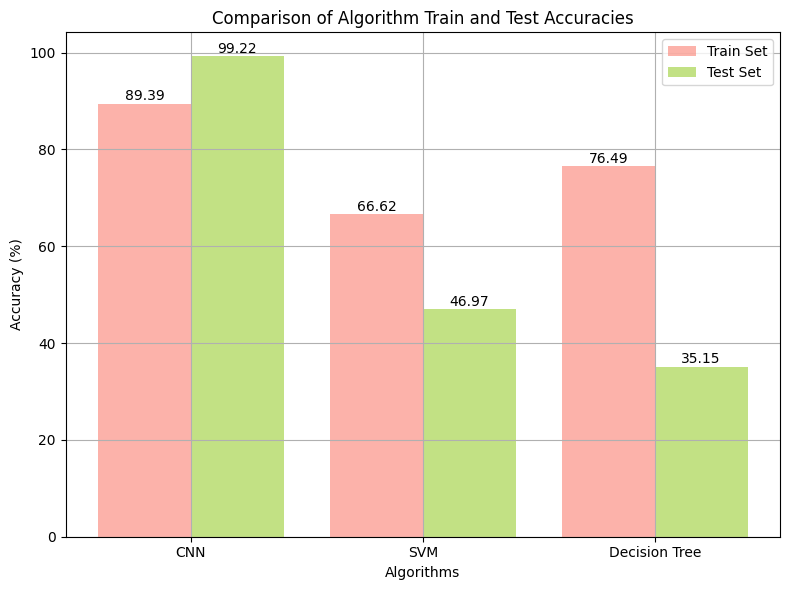

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for accuracy
accuracies_train = [89.39, 66.62, 76.49]
accuracies_test = [99.22, 46.97, 35.15]
classifiers = ['CNN', 'SVM', 'Decision Tree']

# Create a bar graph
plt.figure(figsize=(8, 6))

# Create a single bar position array for both train and test accuracies
num_classifiers = len(classifiers)
bar_positions = np.arange(num_classifiers)  # Create evenly spaced positions

# Plot train and test accuracy bars with custom colors
bar_container1 = plt.bar(bar_positions - barwidth / 2, accuracies_train, alpha=0.6, width=barwidth, label="Train Set", color='salmon')
bar_container2 = plt.bar(bar_positions + barwidth / 2, accuracies_test, alpha=0.6, width=barwidth, label="Test Set", color='yellowgreen')

# Annotate each bar with its corresponding accuracy value
y_offset = 0.1  # Adjust for vertical position of labels
for rect in bar_container1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + y_offset, f"{height:.2f}", ha='center', va='bottom', fontsize=10)  # Format value with 2 decimals

for rect in bar_container2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + y_offset, f"{height:.2f}", ha='center', va='bottom', fontsize=10)  # Format value with 2 decimals

# Set x-axis ticks and labels using bar positions and classifiers
plt.xticks(bar_positions, classifiers)

# Add labels, title, legend, and grid
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Algorithm Train and Test Accuracies')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()
